In [9]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

In [15]:
d = joblib.load("./part1_speaker_recognition/gridsearch/results/part1_hrscv_LinearSVC.pkl")
d2 = joblib.load("./part1_speaker_recognition/gridsearch/results/part1_hrscv_LogisticRegression_mcc.pkl")
d3 = joblib.load("./part2_review/gridsearch/results/part2_hrscv_LinearSVC_oui.pkl")

In [20]:
def plot_n_save(d, save_path):
    pipeline = d.best_estimator_
    features = pd.Series(pipeline.named_steps["model"].coef_[0], index=pipeline.named_steps["vect"].vocabulary_)
    features_sorted = features.sort_values()
    top20 = pd.concat((features_sorted[:20], features_sorted[-20:]))
    df = pd.DataFrame({
    "Poids": top20,
    "Classe": ["Mitterrand" for i in range(20)] + ["Chirac" for i in range(20)]
    })
    sns.set_context("paper")
    fig, ax = plt.subplots(figsize=(10,5))
    sns.barplot(data=df.reset_index(names="Mots"), x="Mots", y="Poids", hue="Classe", dodge=False, ax=ax)
    ax.set_xticks(*plt.xticks(), rotation=45, ha='right', rotation_mode='anchor')
    plt.savefig(save_path, dpi=100, bbox_inches="tight")
    plt.show()

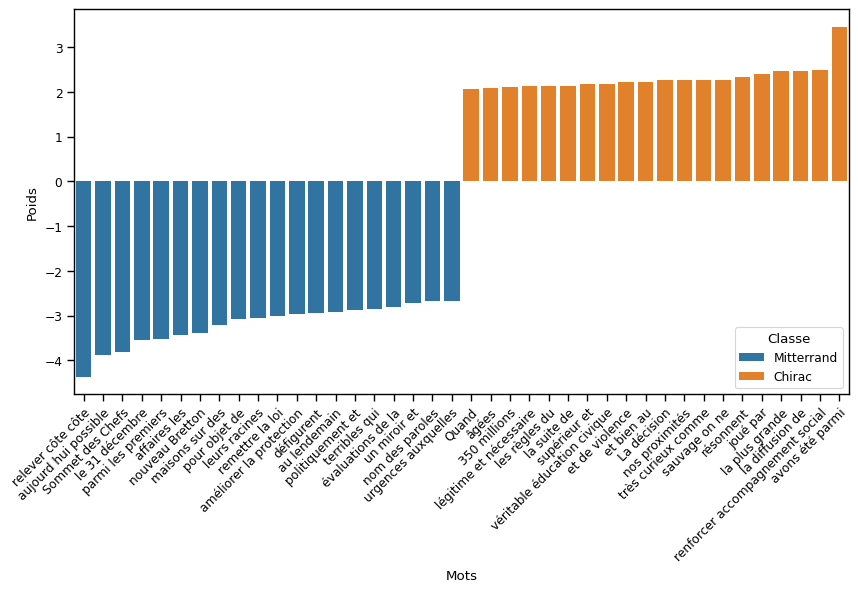

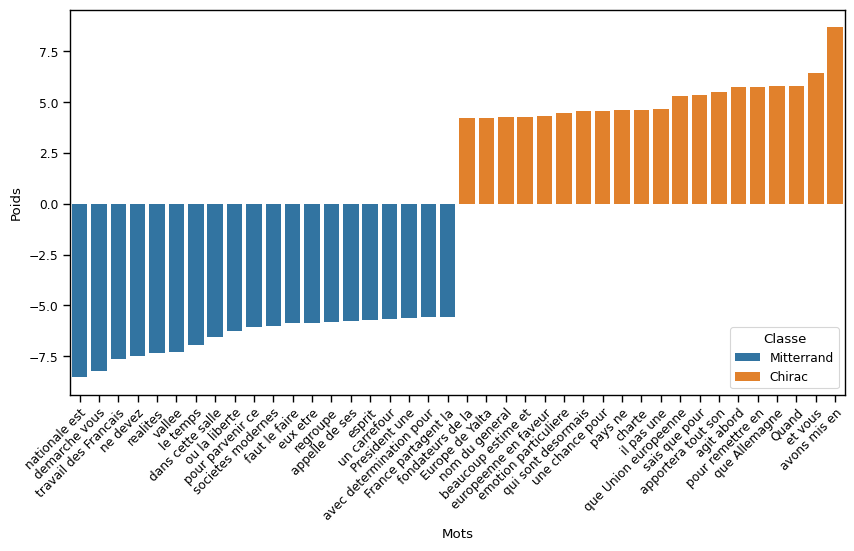

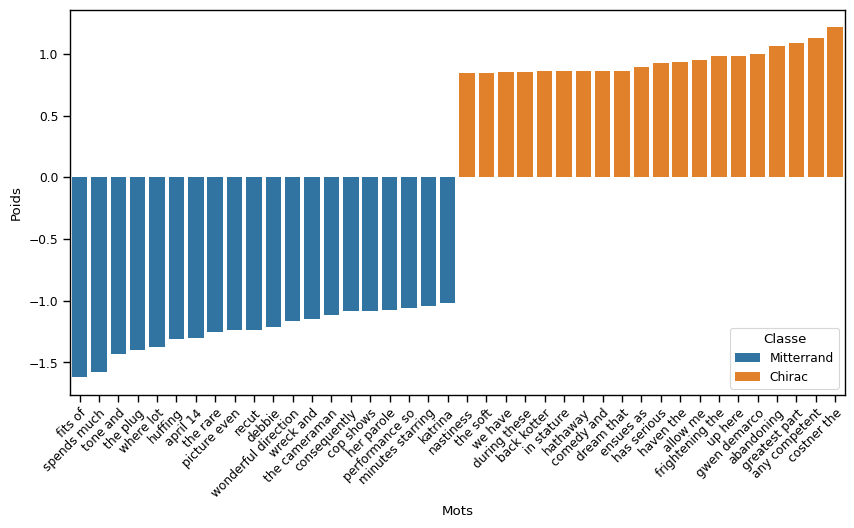

In [21]:
plot_n_save(
    d,
    "part1_speaker_recognition/reports/figures/param_analysis_SVC.png"
)
plot_n_save(
    d2,
    "part1_speaker_recognition/reports/figures/param_analysis_MCC.png"
)
plot_n_save(
    d3,
    "part2_review/reports/figures/param_analysis_SVC.png"
)